In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

In [39]:
# Load the dataset
data = pd.read_csv("Material.csv")
data

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07
...,...,...,...,...,...,...,...,...,...
6134,188.78,162.30,142.65,163.66,15.98,1003.82,1002.47,357.91,50.61
6135,349.87,291.45,77.82,188.26,25.82,925.10,1005.31,104.20,54.24
6136,358.29,22.70,17.99,208.58,34.91,1081.07,792.44,302.76,56.57
6137,445.25,275.59,178.86,191.77,18.07,865.15,833.10,374.63,58.21


In [40]:
data.dtypes

Material Quantity (gm)        float64
Additive Catalyst (gm)        float64
Ash Component (gm)            float64
Water Mix (ml)                float64
Plasticizer (gm)              float64
Moderate Aggregator           float64
Refined Aggregator            float64
Formulation Duration (hrs)    float64
Compression Strength MPa      float64
dtype: object

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


In [42]:
data.isnull().sum()

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64

In [43]:
data=data.interpolate()
data

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07
...,...,...,...,...,...,...,...,...,...
6134,188.78,162.30,142.65,163.66,15.98,1003.82,1002.47,357.91,50.61
6135,349.87,291.45,77.82,188.26,25.82,925.10,1005.31,104.20,54.24
6136,358.29,22.70,17.99,208.58,34.91,1081.07,792.44,302.76,56.57
6137,445.25,275.59,178.86,191.77,18.07,865.15,833.10,374.63,58.21


In [44]:
data.isnull().sum()

Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
Compression Strength MPa      0
dtype: int64

In [45]:
data.head()

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07


In [46]:
#for testing purpose we have to create sample data and this will be generated randomly.
sample_data = data.sample(n=10)

In [47]:
sample_data

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
4907,407.49,234.19,131.66,290.74,1.67,1145.56,871.92,24.09,72.32
225,622.73,82.15,92.32,150.29,1.17,1094.69,1000.98,126.57,54.10
5074,157.78,406.70,111.49,212.91,35.15,856.10,834.49,177.61,39.99
2645,283.24,136.85,66.22,294.36,7.73,981.49,725.86,107.05,69.16
2418,181.78,169.58,132.98,235.46,7.32,914.87,800.00,43.25,26.53
2883,305.00,0.00,116.75,234.00,6.47,973.23,879.18,71.25,44.40
3934,637.74,273.99,59.29,160.92,28.06,973.21,915.13,114.18,70.83
4726,638.35,344.16,51.81,234.74,10.33,887.90,751.50,98.99,62.05
1790,306.71,0.00,144.33,229.97,7.08,1054.77,777.13,43.25,33.21
3459,489.25,359.08,176.05,223.66,38.80,823.78,762.26,164.49,53.05


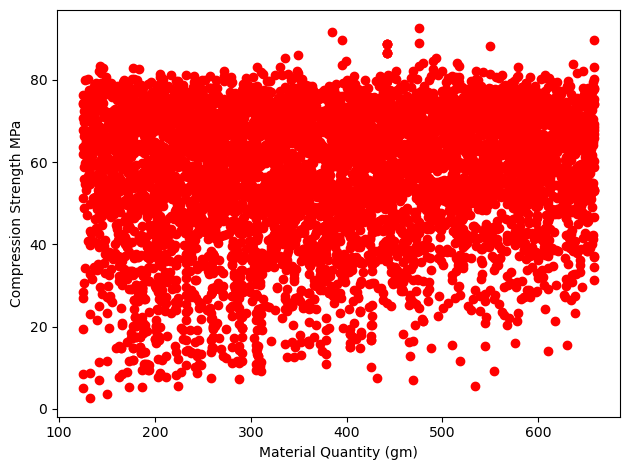

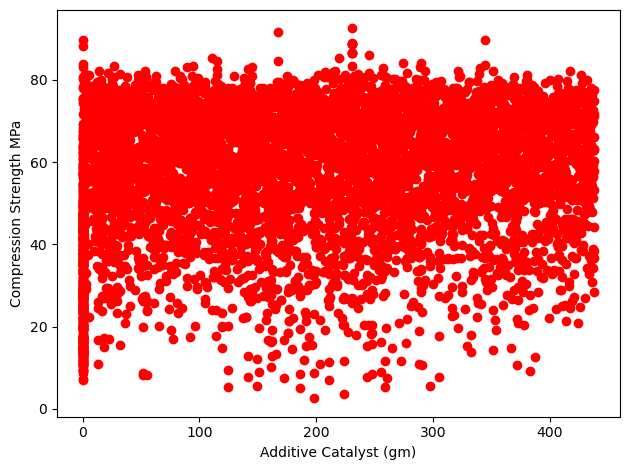

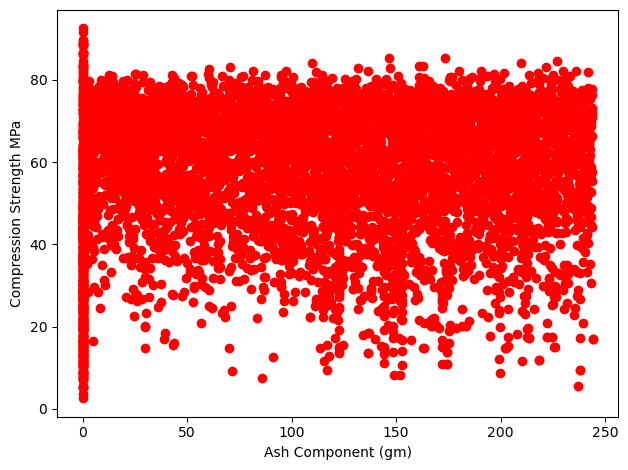

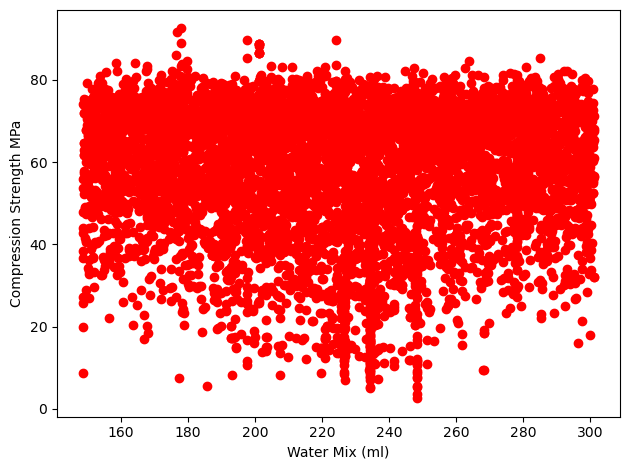

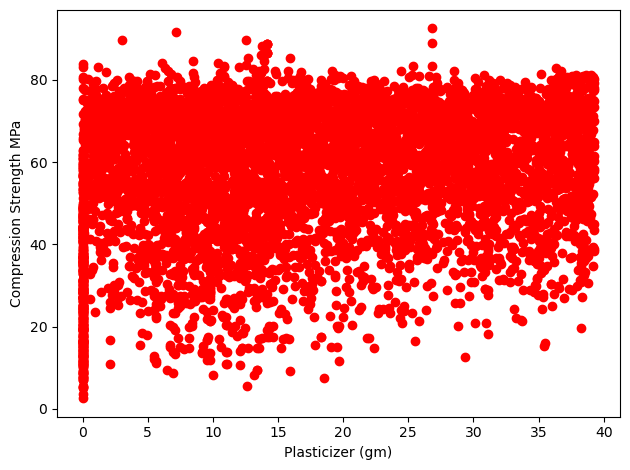

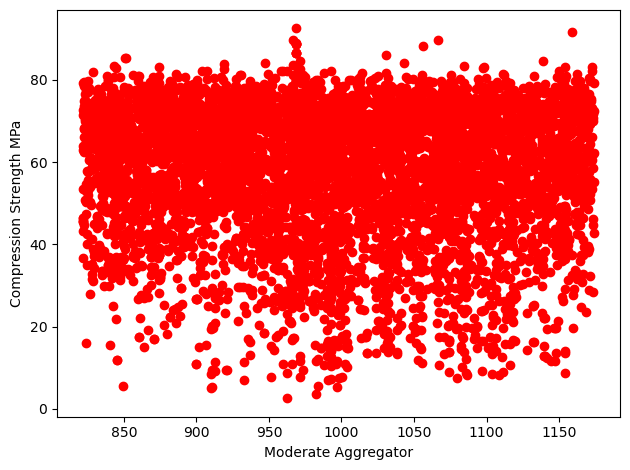

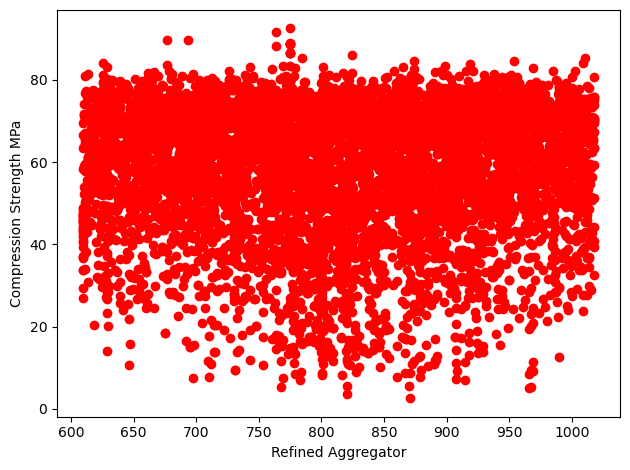

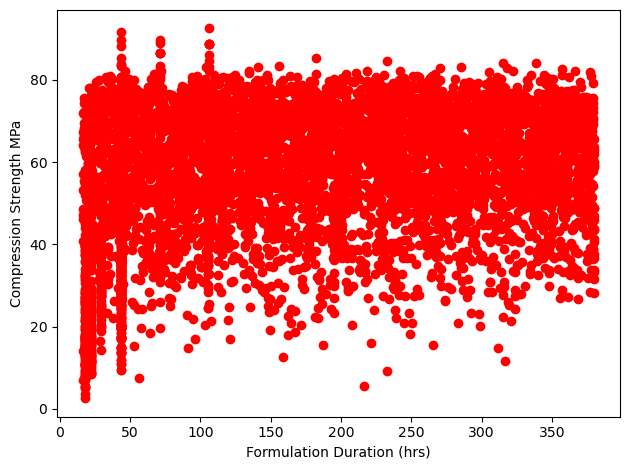

In [48]:
X = 'Compression Strength MPa'
y = data.columns.drop(X)
for variable in y:
    plt.scatter(data[variable], data[X],color='red')
    plt.xlabel(variable)
    plt.ylabel(X)
    plt.tight_layout()
    plt.show()

In [49]:
# Split dataset into features (X) and target (y)
X=data[['Material Quantity (gm)', 'Additive Catalyst (gm)','Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)','Moderate Aggregator', 'Refined Aggregator','Formulation Duration (hrs)']]
y= data[["Compression Strength MPa"]]

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4604, 8) (4604, 1)
(1535, 8) (1535, 1)


In [51]:
# Create and train the regression model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [52]:
# Make predictions
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2s = r2_score(y_test, y_pred)
print(f"r2 score: {r2s}")

Mean Squared Error: 152.38043912727966
r2 score: 0.4229006558136966


In [54]:
import joblib
model_filename = 'model.pkl'
joblib.dump(model,model_filename)

['model.pkl']

In [55]:
pickle.dump(model, open('model.pkl', 'wb'))